## Classification data

In [1]:
from fri import genClassificationData
X,y = genClassificationData(n_samples=200, n_features=5,n_strel=2, n_redundant=2,
                    n_repeated=0, flip_y=0,random_state=2)

Generating dataset with d=5,n=200,strongly=2,weakly=2, partition of weakly=None


In [2]:
X.shape

(200, 5)

We created a binary classification set with 6 features of which 2 are strongly relevant and 2 weakly relevant.

Scale Data

In [3]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

New object for Classification Data

In [4]:
from fri import FRIClassification
fri = FRIClassification()

Fit to data

In [5]:
fri.fit(X_scaled,y)

Print out feature relevance intervals

In [6]:
fri.interval_

array([[ 0.36798572,  0.37821986],
       [ 0.14331004,  0.15923453],
       [ 0.        ,  0.48456378],
       [ 0.        ,  0.48456378],
       [ 0.        ,  0.01385291]])

In [7]:
fri.interval_ * fri.optim_L1_

array([[ 2.2085601 ,  2.2699829 ],
       [ 0.86011172,  0.95568659],
       [ 0.        ,  2.90823301],
       [ 0.        ,  2.90823301],
       [ 0.        ,  0.08314179]])

### Plot results

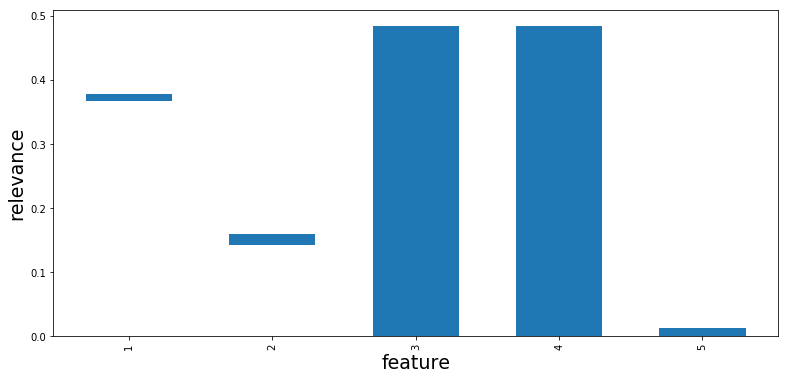

In [8]:
from fri import plot
%matplotlib inline
p = plot.plotIntervals(fri.interval_)

In [9]:
fri.community_detection2(X_scaled,y)

In [10]:
fri.distmat

array([  1.47890595e-01,   2.22044605e-16,   0.00000000e+00,
         3.82452537e-01,   3.60474540e-01,   3.60474540e-01,
         7.42927077e-01,   2.12583945e-01,   5.95036482e-01,
         5.95036482e-01])

In [11]:
fri.featclust

array([1, 1, 1, 1, 2], dtype=int32)

In [12]:
fri.linkage_

array([[ 0.        ,  3.        ,  0.        ,  2.        ],
       [ 2.        ,  5.        ,  0.17357406,  3.        ],
       [ 1.        ,  6.        ,  0.36516533,  4.        ],
       [ 4.        ,  7.        ,  0.727904  ,  5.        ]])

In [13]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

{'color_list': ['g', 'g', 'g', 'b'],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.17357406442463214, 0.17357406442463214, 0.0],
  [0.0, 0.36516533164494847, 0.36516533164494847, 0.17357406442463214],
  [0.0, 0.7279039984022162, 0.7279039984022162, 0.36516533164494847]],
 'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'ivl': ['4', '1', '2', '0', '3'],
 'leaves': [4, 1, 2, 0, 3]}

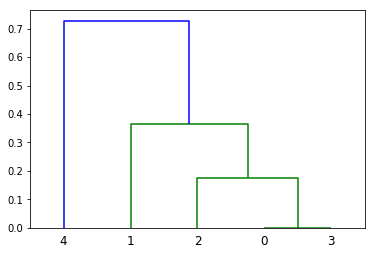

In [17]:
hierarchy.dendrogram(fri.linkage_)